# Backcalculate pavement layer properties using TSD deflections

In [1]:
import numpy as np
from cela import ela
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Known deflections

In [4]:
D = np.array([37.614535, 17.137791, 10.395930, 5.151744, 3.065698, 1.584884, 1.036047, 0.690698, 0.450000])

In [2]:
veh = np.array([10000, 125], dtype=np.float64)  # wheel load (lbf) and tire pressure (psi)
wx = np.zeros(10, dtype=np.float64)  # wheel x locations
wy = np.zeros(10, dtype=np.float64)  # wheel y locations
ox = np.array([0, 8, 12, 18, 24, 36, 48, 60, 72], dtype=np.float64)  # output x locations
oy = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=np.float64)  # output y locations

poi = np.array([0.35, 0.35, 0.35], dtype=np.float64)  # layer Poisson's ratios
nlay = 3  # Number of layers
nwhl = 1  # Number of wheel laods
nloc = 9  # Number of output locations
ret = np.zeros((10, 3, 10), dtype=np.float64)  # the result array

## Estimate subgrade modulus

In [5]:
Mra = 0.2475*veh[0]/(ox[1:]*math.pi*D[1:])  # in psi

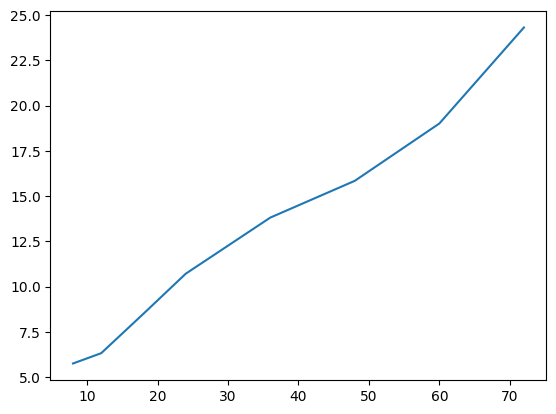

In [6]:
plt.plot(ox[1:], Mra)

## Minimize the difference between calculated and known deflections to estimate layer properties

In [10]:
def solve(x):
    result = 0.
    thk = np.array([x[0], x[1], 999], dtype=np.float64)
    mod = np.array([x[2], x[3], 999999999], dtype=np.float64)
    ela(ret, veh, thk, mod, poi, wx, wy, ox, oy, nlay, nwhl, nloc)
    d = 1000*np.array([ret[k][2][4] for k in range(nloc)])
    result = np.sum(np.square(d-D))
    return result

x0 = np.array([25., 10., 50000., 50000.])
bounds = [(1., 999.), (1., 999.), (999., 999999999.), (999., 999999999.)]
opt = minimize(solve, x0, method='Nelder-Mead', bounds=bounds, options={'disp': True})
print(opt)

Optimization terminated successfully.
         Current function value: 5.344688
         Iterations: 258
         Function evaluations: 468
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 5.344687819911679
             x: [ 7.325e+01  9.539e+00  2.512e+04  3.970e+03]
           nit: 258
          nfev: 468
 final_simplex: (array([[ 7.325e+01,  9.539e+00,  2.512e+04,  3.970e+03],
                       [ 7.325e+01,  9.539e+00,  2.512e+04,  3.970e+03],
                       ...,
                       [ 7.325e+01,  9.539e+00,  2.512e+04,  3.970e+03],
                       [ 7.325e+01,  9.539e+00,  2.512e+04,  3.970e+03]],
                      shape=(5, 4)), array([ 5.345e+00,  5.345e+00,  5.345e+00,  5.345e+00,
                        5.345e+00]))


In [12]:
thk = np.array([opt.x[0], opt.x[1], 999], dtype=np.float64)
mod = np.array([opt.x[2], opt.x[3], 999999999], dtype=np.float64)
ela(ret, veh, thk, mod, poi, wx, wy, ox, oy, nlay, nwhl, nloc)
d = 1000*np.array([ret[k][2][4] for k in range(nloc)])

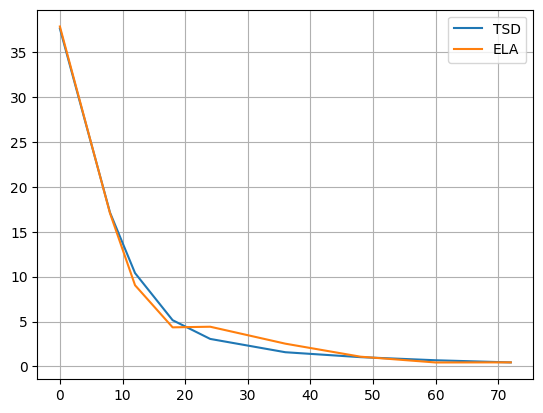

In [14]:
plt.plot(ox, D, label="TSD")
plt.plot(ox, d, label="ELA")
plt.grid()
plt.legend()